# Segmentation of  Mall Customers Using Machine Learning

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("D:\\Python\\Mall_Customers.csv")

## Overview of Dataset

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
80,81,Male,57,54,51
18,19,Male,52,23,29
74,75,Male,59,54,47
115,116,Female,19,65,50
30,31,Male,60,30,4
114,115,Female,18,65,48
5,6,Female,22,17,76
125,126,Female,31,70,77
54,55,Female,50,43,45
40,41,Female,65,38,35


In [24]:
df.shape

(200, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
df.drop('CustomerID',axis = 1, inplace = True)

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Exporatory Data Analysis

<AxesSubplot: xlabel='Age', ylabel='Count'>

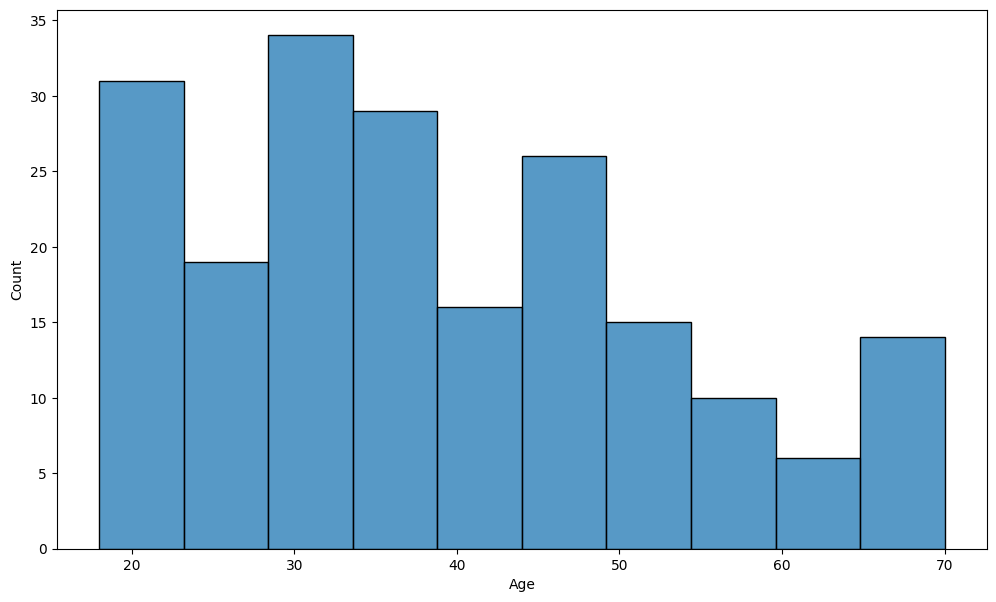

In [30]:
plt.figure(figsize = (12,7))
sns.histplot(x = 'Age', data = df, bins = 10)

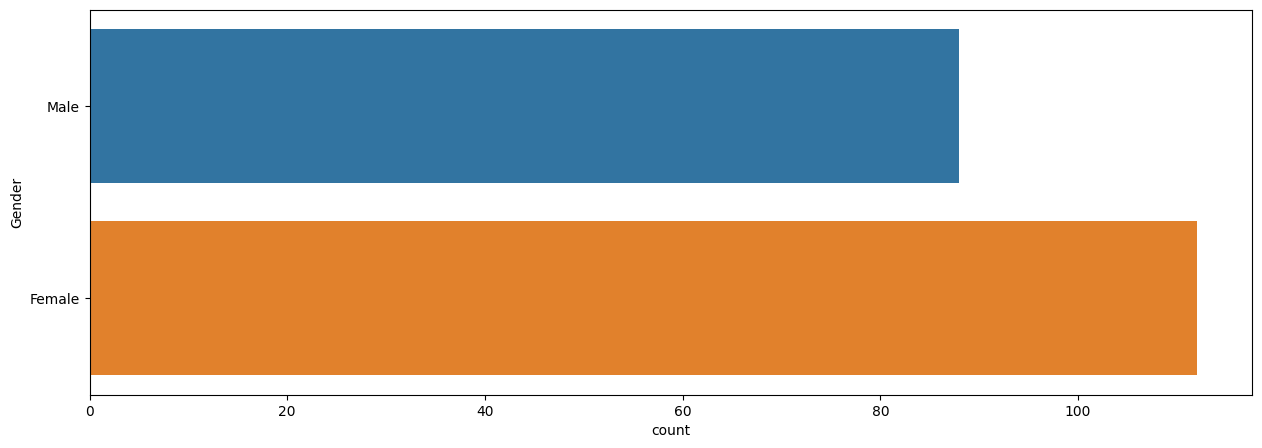

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender',data=df)
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='count'>

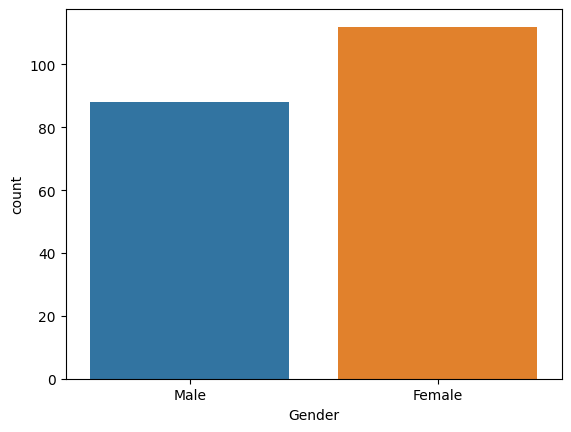

In [32]:
sns.countplot(x = 'Gender', data = df)

In [33]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

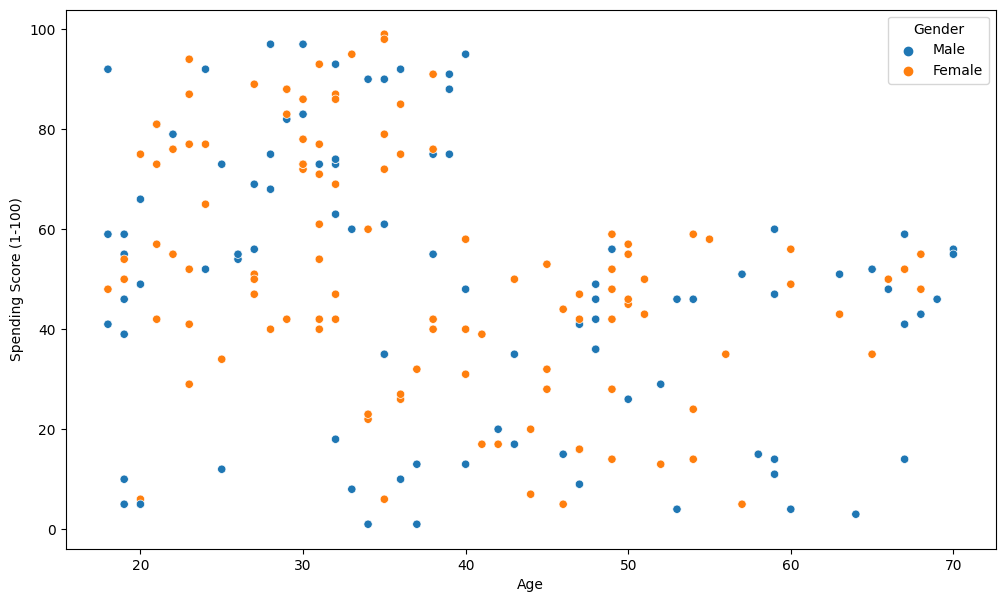

In [34]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = df, hue = 'Gender')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

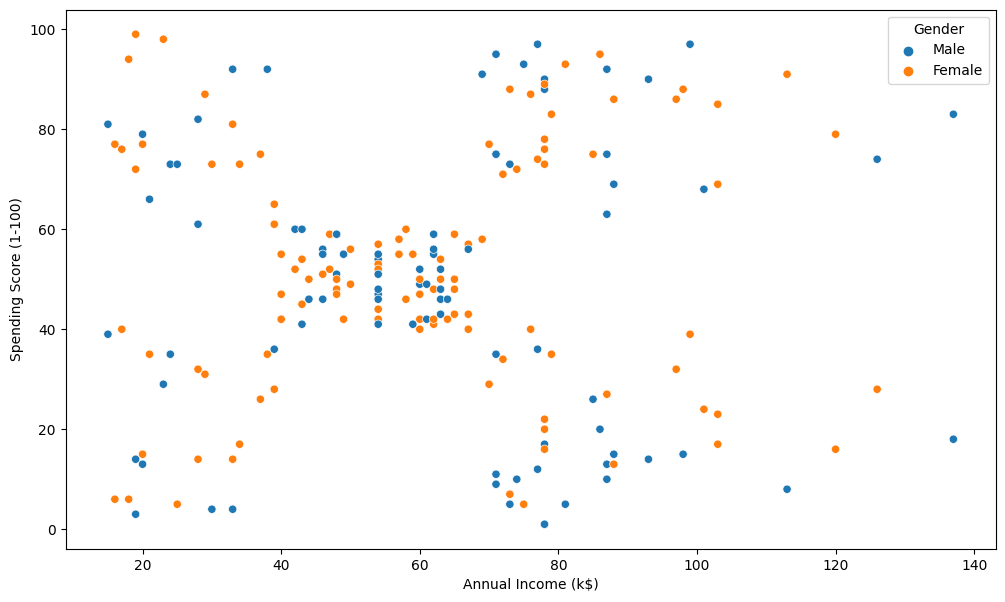

In [35]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'Gender')

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

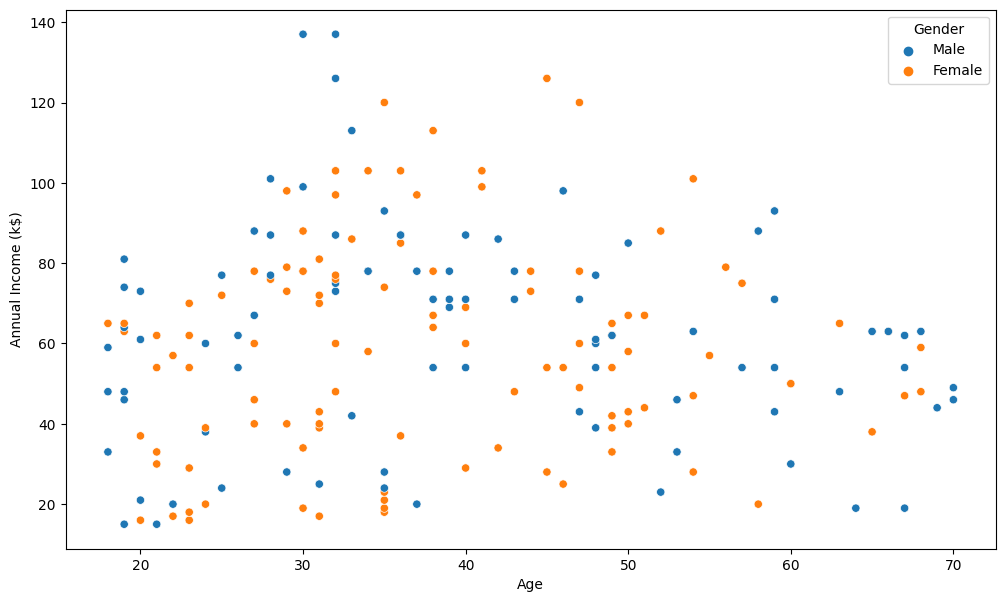

In [36]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = df, hue = 'Gender')

<Figure size 1600x900 with 0 Axes>

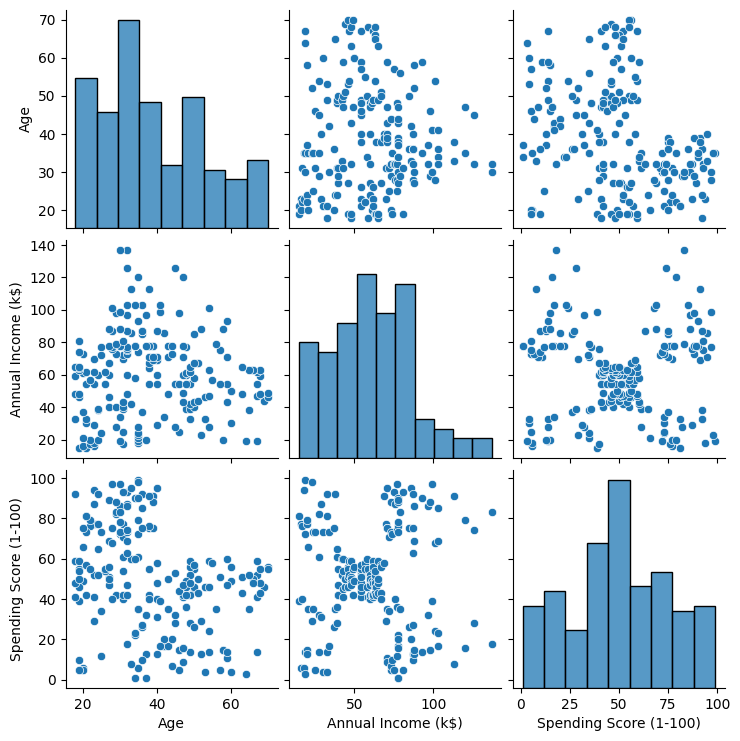

In [38]:
plt.figure(figsize=(16,9))
sns.pairplot(df)
plt.show()

## Clustering Algorithm : K-means

In [76]:
Age_income_df = df.iloc[:,1:3].values
print(Age_income_df)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

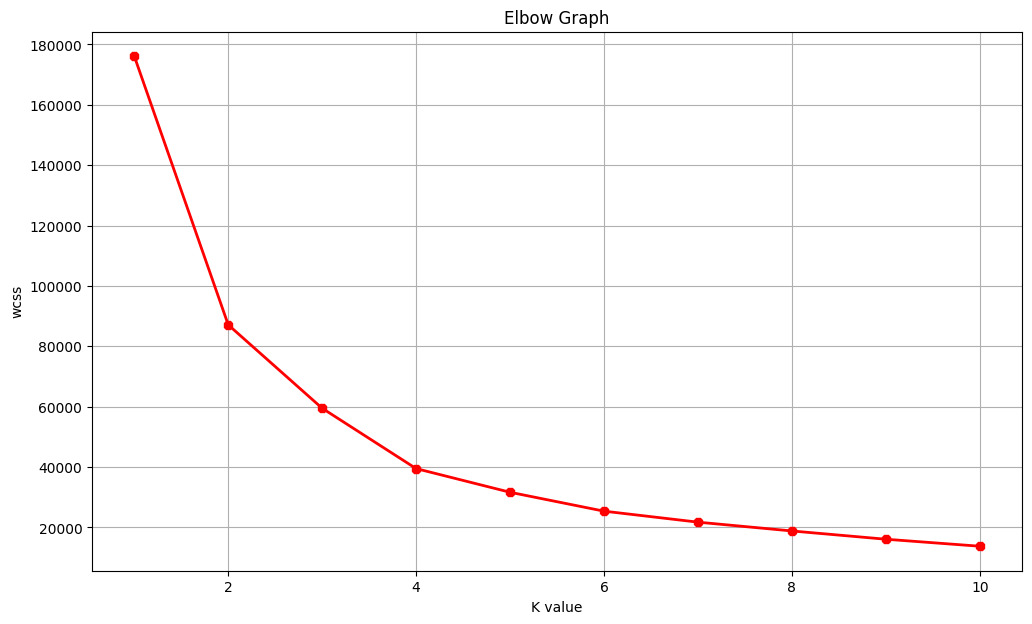

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(Age_income_df)
    wcss.append(kmeans.inertia_)
    plt.figure(figsize = (12,7))
plt.grid()
plt.plot(range(1,11), wcss,linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('wcss')
plt.title('Elbow Graph')
plt.show()
   
   

In [42]:
n_clusters = 5
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(Age_income_df)
print(label)

[0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [43]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Age_income_df, label)
print(silhouette_avg)

0.43368606798330267


In [44]:
print(kmeans.cluster_centers_)

[[ 29.44680851  29.21276596]
 [ 31.95890411  72.95890411]
 [ 55.66071429  51.01785714]
 [ 39.         106.5       ]]


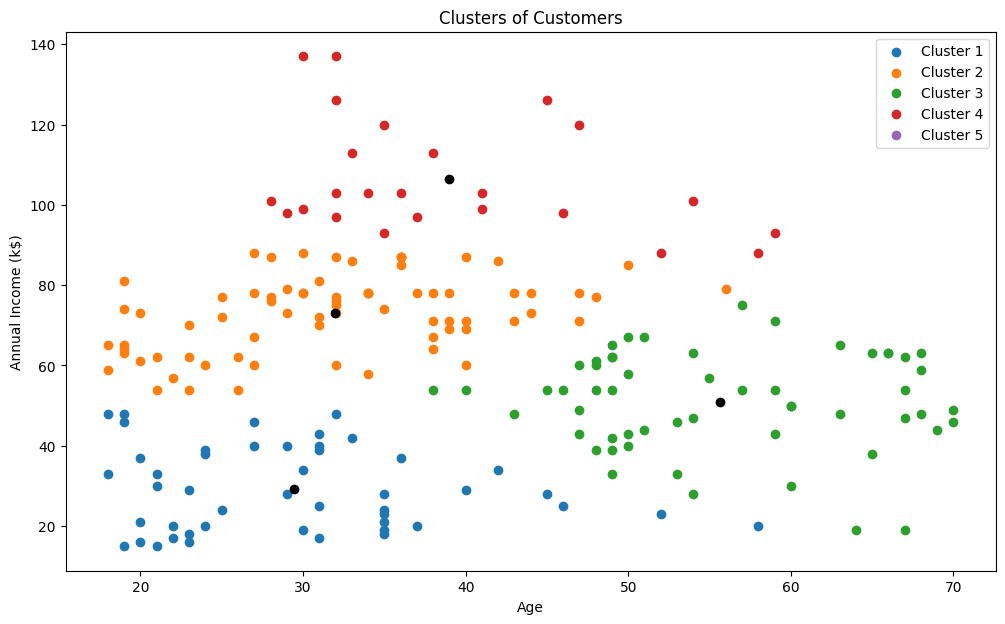

In [45]:
plt.figure(figsize = (12,7))

for i in range(0 ,n_clusters):
    plt.scatter(Age_income_df[label == i, 0], Age_income_df[label == i, 1], label = 'Cluster ' + str(i + 1))
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

After Observing the above Scatterplot -
1. People with age between 30-50 are having medium-to-high annual income.
2. People having younger age are having low-to-medium annual income.
3. Most people with age > 50 are haing low-to-medium annual income.

In [46]:
Age_spending_df = df.iloc[:,[1,3]].values
print(Age_spending_df)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(Age_spending_df)
    wcss.append(kmeans.inertia_)

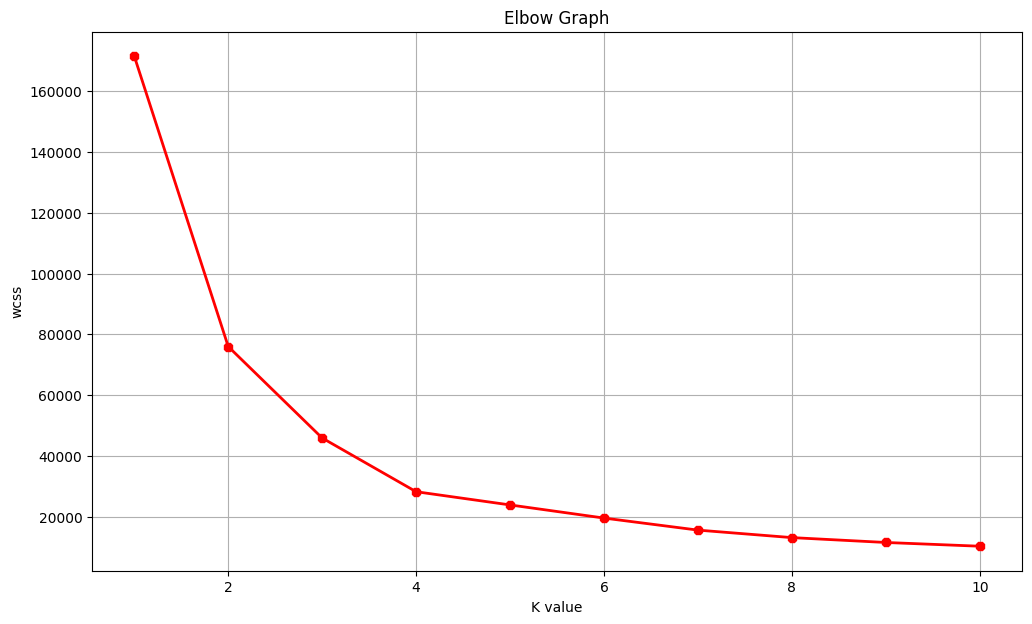

In [48]:
plt.figure(figsize = (12,7))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('wcss')
plt.title('Elbow Graph')
plt.show()

In [49]:
n_clusters = 4
kmeans = KMeans(n_clusters)
label = kmeans.fit_predict(Age_spending_df)
print(label)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [50]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Age_spending_df, label)
print(silhouette_avg)

0.49973941540141753


In [51]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


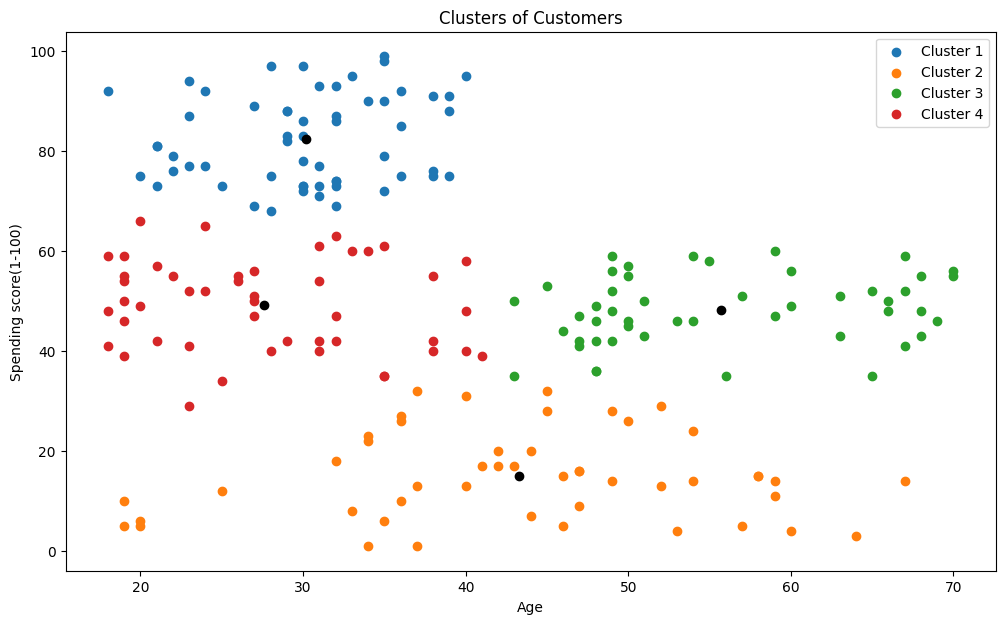

In [52]:
plt.figure(figsize = (12,7))

for i in range(0 ,n_clusters):
    plt.scatter(Age_spending_df[label == i, 0], Age_spending_df[label == i, 1], label = 'Cluster ' + str(i + 1))
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

From the above Scatterplot -
1. People with age < 40 and high spending-score.
2. People with age < 40 and medium spending-score.
3. People with age > 45 and medium spending-score.
4. People with age > 30 and low spending-score.

Young AND adult people are having high spending-score.
While older people are having low-to-medium spending-score.

In [53]:
Income_spending_df = df.iloc[:,2:4].values
print(Income_spending_df)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(Income_spending_df)
    wcss.append(kmeans.inertia_)

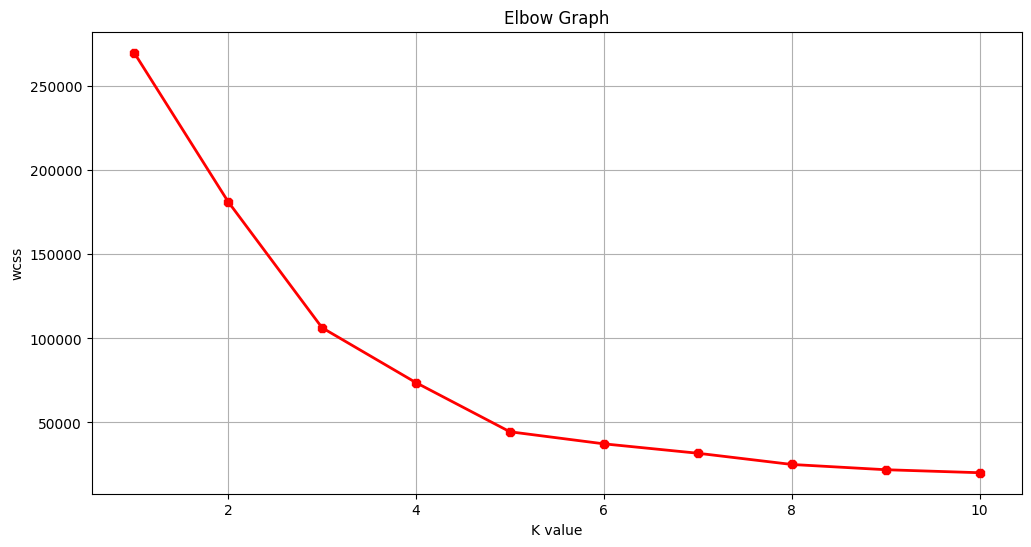

In [55]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('wcss')
plt.title('Elbow Graph')
plt.show()

In [56]:
n_clusters = 5
kmeans = KMeans(n_clusters)
label = kmeans.fit_predict(Income_spending_df)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [57]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Income_spending_df, label)
print(silhouette_avg)

0.553931997444648


In [58]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


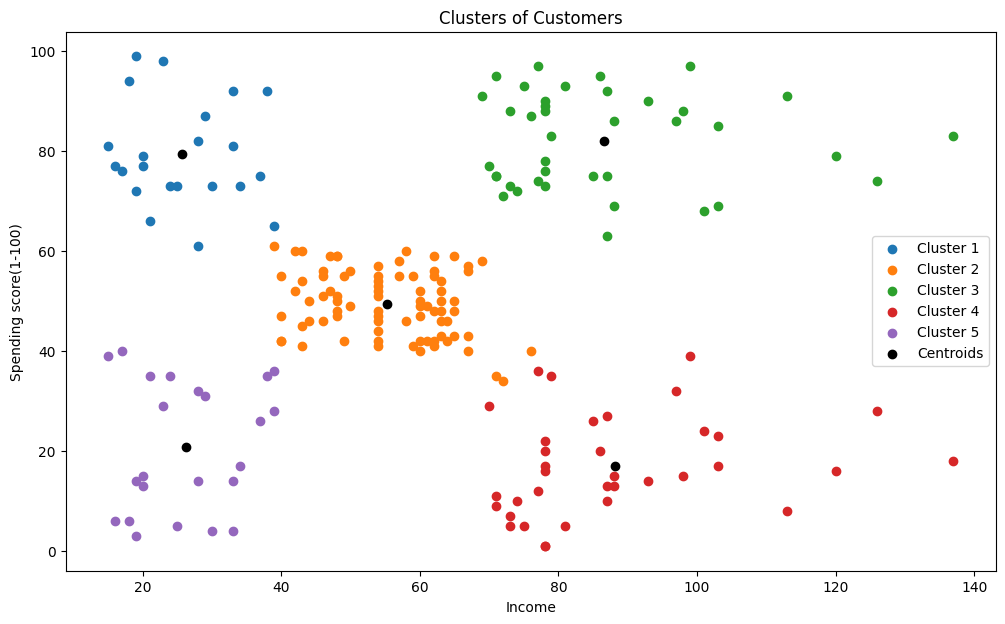

In [59]:
plt.figure(figsize = (12,7))

for i in range(0 ,n_clusters):
    plt.scatter(Income_spending_df[label == i, 0], Income_spending_df[label == i, 1], label = 'Cluster ' + str(i + 1))
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

After observing the above Scatterplot -
1. People with low annual income but high spending-score.
2. People with average annual income with average spending-score.
3. People with low annual income and low spending-score.
4. People with high annual income and high spending-score as well.
5. People with high annual income but low spending-score.

In [60]:
Age_income_spending_df = df.iloc[:,1:].values
print(Age_income_spending_df)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [61]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(Age_income_spending_df)
    wcss.append(kmeans.inertia_)

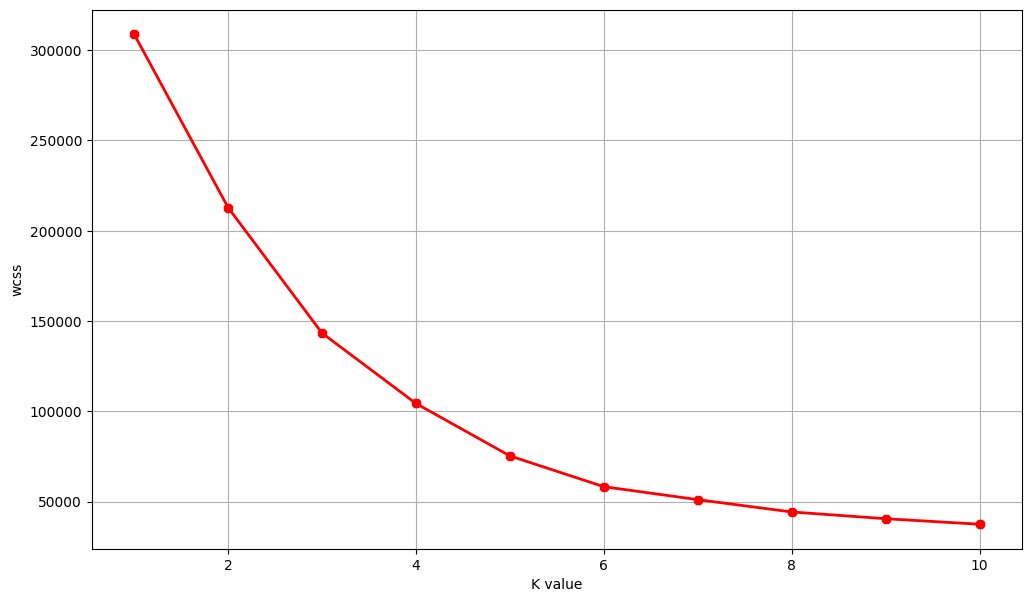

In [62]:
plt.figure(figsize = (12,7))
plt.grid()
plt.plot(range(1,11), wcss,linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('wcss')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(Age_income_spending_df)
print(label)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 3 0 3 4 1 0 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 3 4 3 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
 4 4 4 4 4 3 3 3 3 4 4 4 2 4 2 5 2 5 2 5 2 4 2 5 2 5 2 5 2 5 2 4 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2]


In [78]:
print(kmeans.cluster_centers_)

[[25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]
 [32.69230769 86.53846154 82.12820513]
 [56.15555556 53.37777778 49.08888889]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]]


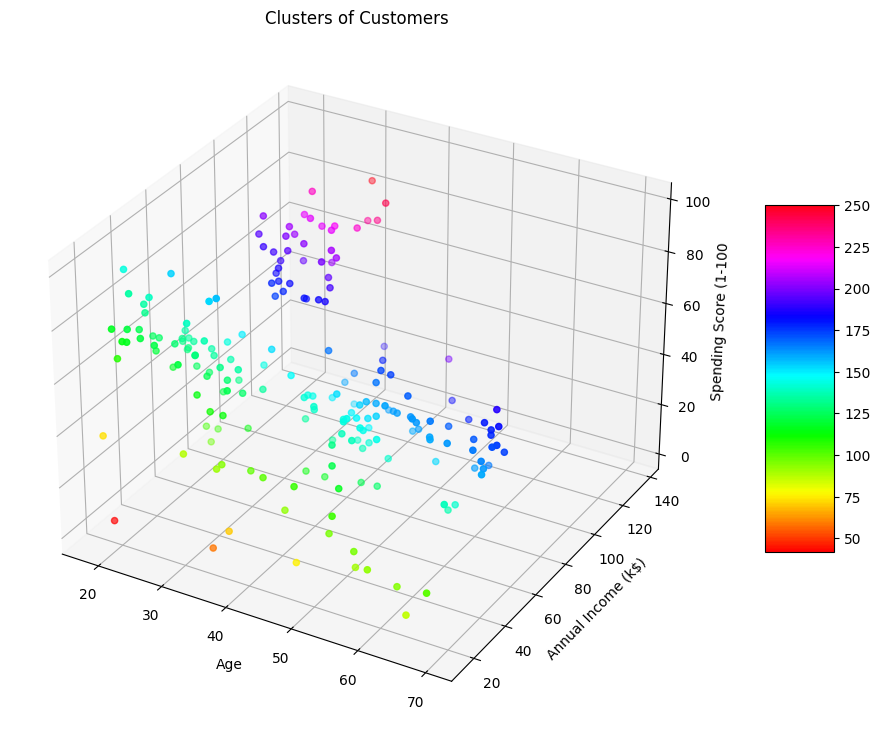

In [77]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection = '3d')

my_cmap = plt.get_cmap('hsv')
x = np.array(Age_income_spending_df[:,0])
y = np.array(Age_income_spending_df[:,1])
z = np.array(Age_income_spending_df[:,2])

sctt = ax.scatter3D(x, y, z, c = (x+y+z), cmap = my_cmap)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100')
plt.title('Clusters of Customers')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()